In [120]:
%matplotlib inline

In [121]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
from ipywidgets import interact

# Experimental Data Equations

In [122]:
def conversion(K):
    x = (K_start - K)/(K_start - K_final) 
    return x

In [123]:
def concNaOH(x):
    cB = 0.02*(1-x)
    return cB

# Theoretical Equations

In [124]:
def ri(C):
    CA, CB = C
    rA = -k*(CA**m)*(CB**n)
    rB = rA
    return rA, rB

In [125]:
def BR_dNAdt(N, t):
    NA, NB = N
    CA, CB = NA/V, NB/V
    rA, rB = ri([CA, CB])
    dNAdt = rA*V
    dNBdt = rB*V
    return dNAdt, dNBdt

In [202]:
def PFR_dFAdV(F, V):
    FA, FB = F
    CA, CB = FA/Q, FB/Q
    rA, rB = ri([CA, CB])
    dFAdV = rA
    dFBdV = rB
    return [dFAdV, dFBdV]

In [203]:
def CSTR(F):
    FA, FB = F
    CA, CB = FA/Q, FB/Q
    rA, rB = ri([CA, CB])
    molbalA = FAo - FA + rA*V
    molbalB = FBo - FB + rB*V
    return molbalA, molbalB

# K-start and K-finish

### K-start

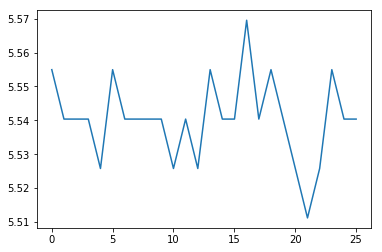

In [204]:
pKstart = pd.read_excel('Kstart_finish.xlsx', sheet_name = 'Kstart')
plt.plot(pKstart['t'], pKstart['K'])

In [205]:
K_start = pKstart['K'].mean()
print(K_start)

5.54038023076923


### K-finish

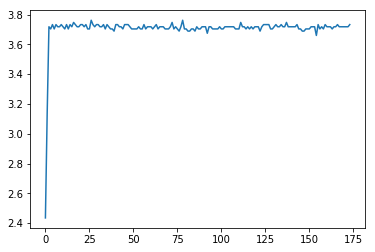

In [206]:
pKfin = pd.read_excel('Kstart_finish.xlsx', sheet_name = 'Kfinish')
plt.plot(pKfin['t'], pKfin['K'])

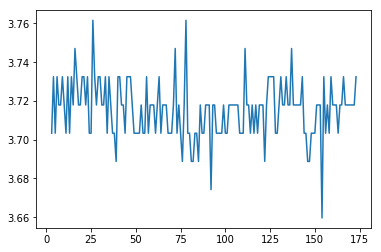

In [207]:
pKfin_ss = pd.DataFrame(data = pKfin, index = range(3, 175))
plt.plot(pKfin_ss['t'], pKfin_ss['K'])

In [208]:
K_final = pKfin_ss['K'].mean()
print(K_final)

3.7154611929824592


# Part 1 - Determine ambient kinetics

- Using a CSTR at 300mL

## Experimental Results

In [209]:
V = 300/1000 # L

In [210]:
SS_K_CSTR = []

### Q = 24 mL/min

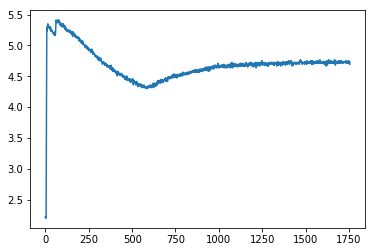

In [211]:
pCSTR_24 = pd.read_excel('Part 1 - CSTR.xlsx', sheet_name = 'Q=24')
t = pCSTR_24['t']
K = pCSTR_24['K']
plt.plot(t,K)

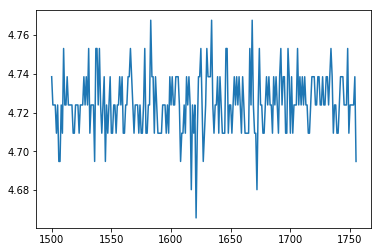

In [212]:
pSS_24mL_CSTR = pd.DataFrame(data = pCSTR_24, index = range(1500, 1757))
plt.plot(pSS_24mL_CSTR['t'], pSS_24mL_CSTR['K'])

In [213]:
SS_K_CSTR_24mL = pSS_24mL_CSTR['K'].mean()
print(SS_K_CSTR_24mL)

4.72500631249999


In [214]:
SS_K_CSTR.append(SS_K_CSTR_24mL)
print(SS_K_CSTR)

[4.72500631249999]


### Q = 30 mL/min

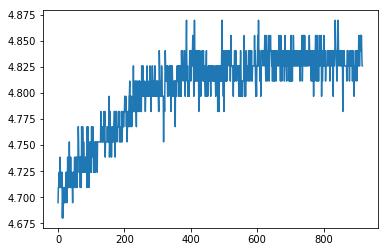

In [215]:
pCSTR_30 = pd.read_excel('Part 1 - CSTR.xlsx', sheet_name = 'Q=30')
t = pCSTR_30['t']
K = pCSTR_30['K']
plt.plot(t, K)

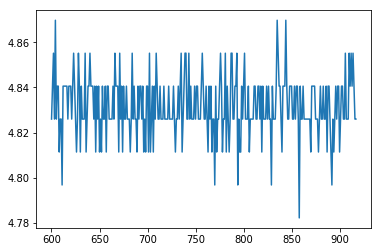

In [216]:
pSS_30mL_CSTR = pd.DataFrame(data = pCSTR_30, index = range(600, 919))
plt.plot(pSS_30mL_CSTR['t'], pSS_30mL_CSTR['K'])

In [217]:
SS_K_CSTR_30mL = pSS_30mL_CSTR['K'].mean()
print(SS_K_CSTR_30mL)

4.831574628930801


In [218]:
SS_K_CSTR.append(SS_K_CSTR_30mL)
print(SS_K_CSTR)

[4.72500631249999, 4.831574628930801]


### Q = 50 mL/min

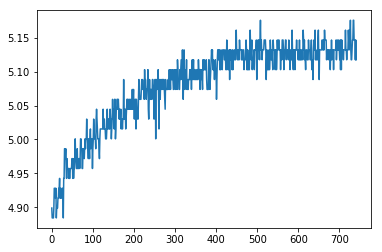

In [219]:
pCSTR_50 = pd.read_excel('Part 1 - CSTR.xlsx', sheet_name = 'Q=50')
plt.plot(pCSTR_50['t'], pCSTR_50['K'])

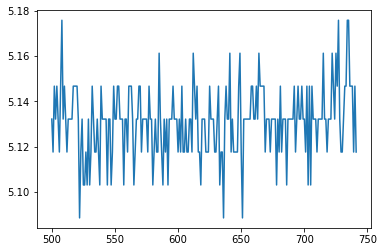

In [220]:
pSS_50mL_CSTR = pd.DataFrame(data = pCSTR_50, index = range(500, 743))
plt.plot(pSS_50mL_CSTR['t'], pSS_50mL_CSTR['K'])

In [221]:
SS_K_CSTR_50mL = pSS_50mL_CSTR['K'].mean()
print(SS_K_CSTR_50mL)

5.130887095041319


In [222]:
SS_K_CSTR.append(SS_K_CSTR_50mL)
print(SS_K_CSTR)

[4.72500631249999, 4.831574628930801, 5.130887095041319]


### Q = 60 mL/min

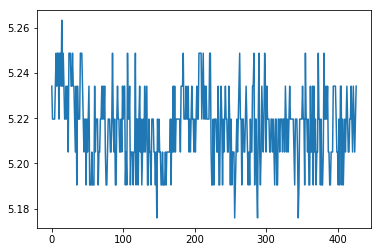

In [223]:
pCSTR_60 = pd.read_excel('Part 1 - CSTR.xlsx', sheet_name = 'Q=60')
plt.plot(pCSTR_60['t'], pCSTR_60['K'])

In [224]:
SS_K_CSTR_60mL = pCSTR_60['K'].mean()
print(SS_K_CSTR_60mL)

5.215908098360669


In [225]:
SS_K_CSTR.append(SS_K_CSTR_60mL)
print(SS_K_CSTR)

[4.72500631249999, 4.831574628930801, 5.130887095041319, 5.215908098360669]


In [226]:
x_CSTR = []
concB_CSTR = []
for K_CSTR in SS_K_CSTR:
    x = conversion(K_CSTR)
    cB = concNaOH(x)
    x_CSTR.append(x)
    concB_CSTR.append(cB)
print(x_CSTR)
print(concB_CSTR)

[0.44680005051517857, 0.3884038618491571, 0.22438975496936944, 0.1778008370179948]
[0.01106399898969643, 0.012231922763016859, 0.015512204900612612, 0.016443983259640103]


In [227]:
Q_CSTR = ((np.array([24, 30, 50, 60]))/1000)/60
τ_CSTR = V/Q_CSTR
print(τ_CSTR)

[750. 600. 360. 300.]


## Theoretical results

In [228]:
V = 300/1000     # L
CAo = 0.04       # mol/L
CBo = 0.02       # mol/L

In [229]:
k = 0.07
m = 1
n = 1


In [230]:
Qrange = np.arange(22,80,2)    # mL/min
Qrange = (Qrange/1000)/60
τ = V/Qrange # min

[0, 800, 0, 1]

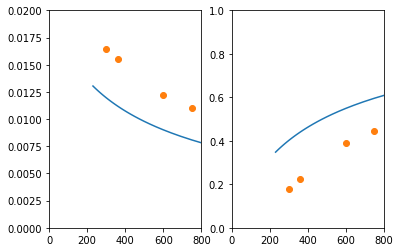

In [231]:
# def int_fun(k = 0.01, m = 1, n = 1):
CSTR1_CB = []
CSTR1_Conv = []

for Q in Qrange:
    FAo, FBo = CAo*Q, CBo*Q # mol/s
    F_CSTR = fsolve(CSTR, [FAo/2, FBo/2])
    C_CSTR = F_CSTR/Q
    CA, CB = C_CSTR
    CSTR1_CB.append(CB)
CSTR1_Conv = (CBo - np.array(CSTR1_CB)) / (CBo)

plt.subplot(1,2,1)
plt.plot(τ, CSTR1_CB, '-')
plt.plot(τ_CSTR, concB_CSTR, 'o')
plt.axis([0,800,0,0.02])
plt.subplot(1,2,2)
plt.plot(τ, CSTR1_Conv, '-')
plt.plot(τ_CSTR, x_CSTR, 'o')
plt.axis([0,800,0,1])

# interact(int_fun, k = (0.01, 0.04, 0.0001), m = (0,2,1), n = (0,2,1))

# Part 2 - Test the ambient kinetics

## - 1. Batch Reactor (200mL total)

### Experimental Results

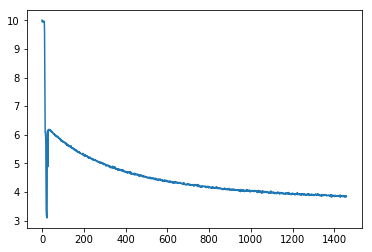

In [232]:
pBatch = pd.read_excel('Part 2 - Batch.xlsx', sheet_name = 'Batch')
plt.plot(pBatch['t'], pBatch['K'])

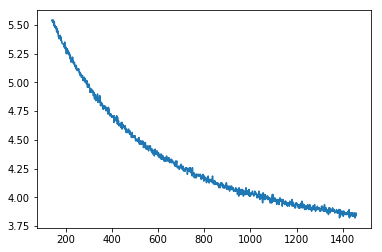

In [233]:
pBatch_refined = pd.DataFrame(data = pBatch, index = range(140,1460))
plt.plot(pBatch_refined['t'], pBatch_refined['K'])

In [234]:
t_exp = pBatch_refined['t']-140
Kvals = pBatch_refined['K']
x_Batch = []
concB_Batch = []
for K in Kvals:
    x = conversion(K)
    cB = concNaOH(x)
    x_Batch.append(x)
    concB_Batch.append(cB)

### Theoretical Results

In [235]:
V = 200/1000 # L
NAo, NBo = CAo*V, CBo*V
tspan = np.linspace(0, 24*60, 5000)

In [236]:
k = 0.07
m = 1
n = 1

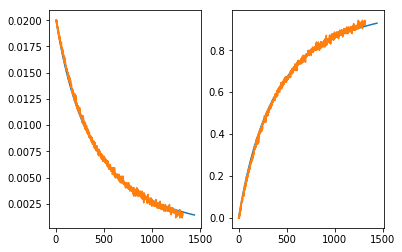

In [237]:
Ni = odeint(BR_dNAdt, [NAo, NBo], tspan)
Ci = Ni/V
CA, CB = Ci[:,0], Ci[:,1]
Batch_conv = (CBo - CB)/CBo
plt.subplot(1,2,1)
plt.plot(tspan, CB)
plt.plot(t_exp, concB_Batch)
plt.subplot(1,2,2)
plt.plot(tspan, Batch_conv)
plt.plot(t_exp, x_Batch)

## - 2. PFR 
- Volume is approximately 300mL -- Check!!!!

### Experimental Results

In [238]:
K_PFR_ss = []

##### Q = 30 mL/min

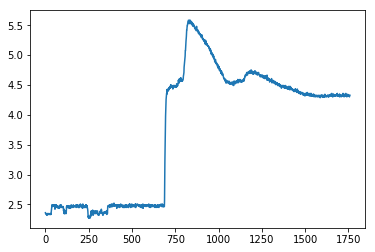

In [239]:
pPFR_30 = pd.read_excel('Part 2 - PFR.xlsx', sheet_name = 'Q=30')
plt.plot(pPFR_30['t'], pPFR_30['K'])

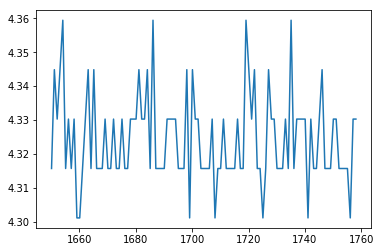

In [240]:
pPFR_30_refined = pd.DataFrame(data = pPFR_30, index = range(1650, 1759))
plt.plot(pPFR_30_refined['t'], pPFR_30_refined['K'])

In [241]:
K_PFR_30ss = pPFR_30_refined['K'].mean()
print(K_PFR_30ss)

4.3242566513761505


In [242]:
K_PFR_ss.append(K_PFR_30ss)

##### Q = 50 mL/min

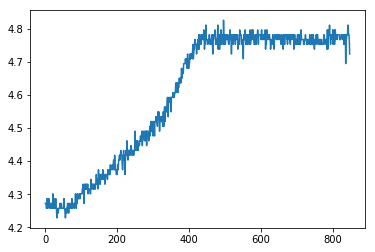

In [243]:
pPFR_50 = pd.read_excel('Part 2 - PFR.xlsx', sheet_name = 'Q=50')
plt.plot(pPFR_50['t'], pPFR_50['K'])

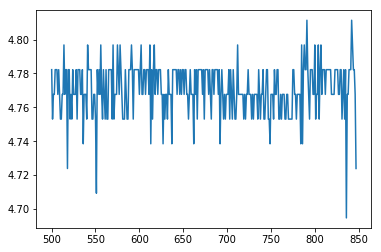

In [244]:
pPFR_50_refined = pd.DataFrame(data = pPFR_50, index = range(500, 848))
plt.plot(pPFR_50_refined['t'], pPFR_50_refined['K'])

In [254]:
K_PFR_50ss = pPFR_50_refined['K'].mean()
print(K_PFR_50ss)

4.770847126436807


In [255]:
K_PFR_ss.append(K_PFR_50ss)
print(K_PFR_ss)

[4.3242566513761505, 4.770847126436807, 4.770847126436807]


In [256]:
x_PFR = []
concB_PFR = []
for K in K_PFR_ss:
    x = conversion(K)
    cB = concNaOH(x)
    x_PFR.append(x)
    concB_PFR.append(cB)

In [257]:
Q = ((np.array([30, 50]))/1000)/60  # L/s
V = 260/1000                        # L
τ_PFR = V/Q                         # s
print(τ_PFR)                        

[520. 312.]


### Theoretical Results

In [258]:
CAo = 0.04 #mol/L
CBo = 0.02 #mol/L

In [259]:
k = 0.6
m = 1
n = 1

In [260]:
V = 260/1000 # L
Vspan = np.linspace(0, V, 1000) # L
Qspan = (np.array([30, 50])/1000)/60
print(Qspan)

[0.0005     0.00083333]


In [263]:
Q1, Q2 = Qspan

0.0005

In [262]:
k = 0.065
FAo, FBo = CAo*Q1, CBo*Q1
F_PFR1 = odeint(PFR_dFAdV, [FAo, FBo], Vspan)
C_PFR1 = F_PFR1 / Q1
CB_PFR1 = C_PFR1[:,1]
PFR_conv1 = (CBo - CB_PFR1)/CBo
τ1 = Vspan/Q1

RuntimeError: The array return by func must be one-dimensional, but got ndim=2.

In [78]:
k = 0.019
FAo, FBo = CAo*Q2, CBo*Q2
F_PFR2 = odeint(PFR_dFAdV, [FAo, FBo], Vspan)
C_PFR2 = F_PFR2 / Q2
CB_PFR2 = C_PFR2[:,1]
PFR_conv2 = (CBo - CB_PFR2)/CBo
τ2 = Vspan/Q2

RuntimeError: The array return by func must be one-dimensional, but got ndim=2.

NameError: name 'τ1' is not defined

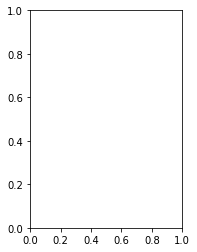

In [72]:
plt.subplot(1,2,1)
plt.plot(τ1, CB_PFR1, '-', label = 'Q1 = 30 mL/min')
plt.plot(τ2, CB_PFR2, '-', label = 'Q2 = 50 mL/min')
plt.plot(τ_PFR, concB_PFR, 'o', label = 'Experimental')
plt.legend(loc = 'lower left')
plt.subplot(1,2,2)
plt.plot(τ1, PFR_conv1, '-', label = 'Q1 = 30 mL/min')
plt.plot(τ2, PFR_conv2, '-', label = 'Q2 = 50 mL/min') 
plt.plot(τ_PFR, x_PFR,'o', label = 'Experimental')
plt.legend(loc = 'upper left')

In [188]:
# for Q in Qspan:
#     FAo, FBo = CAo*Q, CBo*Q
#     F_PFR = odeint(PFR_dFAdV, [FAo, FBo], Vspan)
#     C_PFR = F_PFR / Q
#     CB_PFR = C_PFR[:,1]
#     PFR_conv = (CBo - CB_PFR)/CBo
#     τ = Vspan/Q
#     plt.subplot(1,2,1)
#     plt.plot(Vspan/Q, CB_PFR, '-', label = 'Q = {}'.format(Q))
#     plt.subplot(1,2,2)
#     plt.plot(τ, PFR_conv, '-', label = 'Q = {}'.format(Q))
    
# plt.subplot(1,2,1)
# plt.plot(τ_PFR, concB_PFR, 'o')
# plt.legend(loc = 'lower left')
# plt.subplot(1,2,2)
# plt.plot(τ_PFR, x_PFR,'o')
# plt.legend(loc = 'upper left')

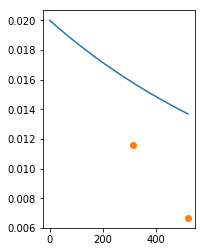

In [181]:
Q = (30/1000)/60 # L/s
FAo, FBo = CAo*Q, CBo*Q
F_PFR = odeint(PFR_dFAdV, [FAo, FBo], Vspan)
C_PFR = F_PFR / Q
CB_PFR = C_PFR[:,1]
plt.subplot(1,2,1)
plt.plot(Vspan/Q, CB_PFR)
plt.plot(τ_PFR, concB_PFR, 'o')

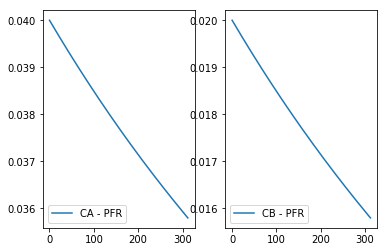

In [139]:
Q = (50/1000)/60 # L/s
FAo, FBo = CAo*Q, CBo*Q
F_PFR = odeint(PFR_dFAdV, [FAo, FBo], Vspan)
C_PFR = F_PFR / Q
CA_PFR, CB_PFR = C_PFR[:,0], C_PFR[:,1]
plt.subplot(1,2,1)
plt.plot(Vspan/Q, CA_PFR, label = 'CA - PFR')
plt.legend(loc = 'lower left')
plt.subplot(1,2,2)
plt.plot(Vspan/Q, CB_PFR, label = 'CB - PFR')
plt.legend(loc = 'lower left')

## 3. Two CSTRs in series
- Each CSTR volume is 150mL

### 3.1 Q = 30 mL/min

In [226]:
Q = (30/1000)/60 # L/s
CAo = 0.04       # mol/L
CBo = 0.02       # mol/L

#### 1st CSTR

In [227]:
FAo, FBo = CAo*Q, CBo*Q
F_CSTR = fsolve(CSTR, [FAo/2, FBo/2])
print(F_CSTR)
Ci_CSTR = F_CSTR/Q
print(Ci_CSTR)

[1.03857173e-05 3.85717326e-07]
[0.02077143 0.00077143]


#### 2nd CSTR

In [228]:
FAo, FBo = F_CSTR[0], F_CSTR[1]
F_CSTR = fsolve(CSTR, [FAo/2, FBo/2])
print(F_CSTR)
Ci_CSTR = F_CSTR/Q
print(Ci_CSTR)

[1.00154059e-05 1.54059082e-08]
[2.00308118e-02 3.08118164e-05]


### 3.2 Q = 50 mL/min

In [229]:
Q = (50/1000)/60   # mL/min
CAo = 0.04 # mol/L
CBo = 0.02 # mol/L

#### 1st CSTR

In [230]:
FAo, FBo = CAo*Q, CBo*Q
F_CSTR = fsolve(CSTR, [FAo/2, FBo/2])
print(F_CSTR)
Ci_CSTR = F_CSTR/Q
print(Ci_CSTR)

[1.76901481e-05 1.02348145e-06]
[0.02122818 0.00122818]


#### 2nd CSTR

In [231]:
FAo, FBo = F_CSTR[0], F_CSTR[1]
F_CSTR = fsolve(CSTR, [FAo/2, FBo/2])
print(F_CSTR)
Ci_CSTR = F_CSTR/Q
print(Ci_CSTR)

[1.67328805e-05 6.62138595e-08]
[2.00794566e-02 7.94566314e-05]
